In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Step1:
Processing Input Data, In this case we will simply generate input data using numpy.

Lets take height and weight of 30 people

In [3]:
import numpy as np
import pandas as pd

def generate_adult_data(num_samples, min_age=30):
    data = []
    for _ in range(num_samples):
        # Realistic height generation (adjust means and stds based on population data)
        height_cm = np.random.normal(170, 7)  # Example: Mean 170cm, std dev 7cm.  Adjust these!!!
        height_feet = height_cm * 0.0328084

        # Weight generation correlated with height and age (more sophisticated)
        # This is a simplified example.  Real-world weight is influenced by many factors.
        base_weight = (height_cm - 100)  # A very rough estimate, adjust this relationship
        weight_variation = np.random.normal(0, 10)  # Add some random variation
        weight_kg = base_weight + weight_variation

        # Ensure weight is not negative
        weight_kg = max(1, weight_kg) # set the floor to 1 kg

        bmi = weight_kg / (height_cm / 100)**2

        # More nuanced obesity classification (adjust thresholds as needed)
        if bmi < 18.5:
            obese = "Normal"
        elif bmi < 25:
            obese = "Normal"
        elif bmi < 30:
            obese = "Obese"
        else:
            obese = "Obese"

        data.append([0,height_feet, weight_kg, obese])

    return pd.DataFrame(data, columns=["Age", "Height in feet", "Weight in Kg", "Obese or not"])


# Generate 1000 samples
num_samples = 200
df = generate_adult_data(num_samples)

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/content/height_weight_balanced_obese_samples.csv")

In [5]:
# prompt: split dataframe into 2 dataframes based on column value

df_obese = df[df.iloc[:,3] == "Obese"]
df_healthy = df[df.iloc[:,3] == "Normal"]

non_obese_height = df_healthy.iloc[:,1].to_numpy()   #np.random.normal(loc=5.5,size=30,scale=0.5)
non_obese_weight = df_healthy.iloc[:,2].to_numpy() #np.random.normal(loc=60,size=30,scale=2.5)
obese_height = df_obese.iloc[:,1].to_numpy()
obese_weight = df_obese.iloc[:,2].to_numpy()


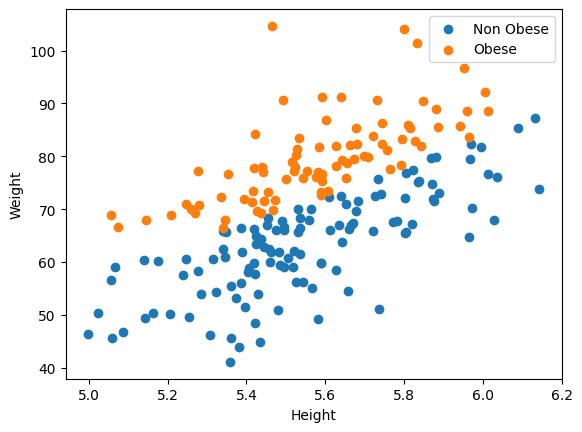

In [6]:
plt.scatter(non_obese_height,non_obese_weight)
plt.scatter(obese_height,obese_weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Non Obese","Obese"])
plt.show()

#Step 2
Space of All possible solutions(Hypothesis)

For x -> Hypothesis -> Y

Lets Build a classifier line that separates people who are obese and not. It can be a straight line that separates both categories

Linear algebra equation for a straight line
ax+by+c=0
x = height
y = weight

This is a standard form of line

https://www.youtube.com/watch?v=-DnmoFnQUtk



In [7]:

non_obese_arr = np.array([non_obese_height,non_obese_weight])
obese_arr= np.array([obese_height,obese_weight])

obese_arr_1 = np.array([list(row) for row in zip(obese_arr[0], obese_arr[1])])
non_obese_arr_1 = np.array([list(row) for row in zip(non_obese_arr[0], non_obese_arr[1])])


#Step 3:
#Finding right solution
Since we can have number of lines, we should always find a line which best fits (separates diff categories like obese and non obese)

One of the properties of linear equation ax+by+c=0 is for a given a,b,c. If we try to replace a (x,y) value in above equation, it will be either a positive or a negative number
So for a random a,b,c values, if we put our (height,weight) we should always get a positive number or a negative number
So if the line eq is perfect then all our obese data points will be completely positive then non_obese data points will be completely negative respectively or vice versa

ideally if we find a best line which better satisfies above condition

This is also called **Loss Function** calculation. And loss should be minimal

In [8]:
def compute_error(obese_items,non_obese_items,a_b_1,c1):
  error = 0
  for obese_item in obese_items:
    x = obese_item[0]
    y = obese_item[1]

    #print(str(x)+"  "+str(y)+"   "+str(a_b_1[0]*x+a_b_1[1]*y+c1) + "  "+str(a_b_1[0])+"  "+str(a_b_1[1])+"  "+str(c1))

    if (a_b_1[0]*x+a_b_1[1]*y+c1) <=0:
      error += 1
  #print("-------------------------------------------------------" + str(error))
  for non_obese_item in non_obese_items:
    x = non_obese_item[0]
    y = non_obese_item[1]
    #print(str(x)+"  "+str(y)+"   "+str(a_b_1[0]*x+a_b_1[1]*y+c1) + "  "+str(a_b_1[0])+"  "+str(a_b_1[1])+"  "+str(c1))
    if (a_b_1[0]*x+a_b_1[1]*y+c1) >=0:
      error += 1
  #print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" + str(error))
  return error

#Step 4: Find the Best Algorithm:
In this step we consume dataset and then generate a best hypothesis

#Step 5: Run Algorithm

In [11]:
k = 50000
best_a_b = None
best_c = None
best_error = float('inf')

for i in range(k):
  a_b = np.random.normal(size=2) #[2.3,-0.3]
  c = np.random.normal() #8.7

  #print(str(a_b) + "  " + str(c))

  error = compute_error(obese_arr_1,non_obese_arr_1,a_b,c)
  if error < best_error:
    print("Iteration: "+str(i)+"  Error:"+str(error))
    best_a_b = a_b
    best_c = c
    best_error = error

print("---------------------")
print(best_a_b)
print(best_c)
print(best_error)

Iteration: 0  Error:118
Iteration: 1  Error:82
Iteration: 299  Error:63
Iteration: 329  Error:12
Iteration: 21146  Error:8
---------------------
[-0.64065073  0.02484509]
1.758813738093295
8


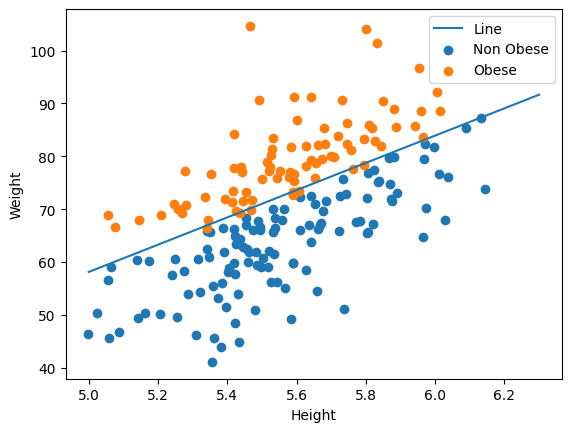

In [12]:
x = np.linspace(5, 6.3, 100)
# Calculate corresponding y values for the line
y = (-best_a_b[0] * x - best_c) / best_a_b[1] #(-a * x - c) / b

# Plot the line
plt.plot(x, y)


plt.scatter(non_obese_height,non_obese_weight)
plt.scatter(obese_height,obese_weight)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(["Line","Non Obese","Obese"])
#plt.xlim(0)  # Set the lower limit of the x-axis to 0
#plt.ylim(0)  # Set the lower limit of the y-axis to 0
plt.show()

#Step 6: validate results
Lets take a new height and weight and try to find if it is obese or not

In [16]:
def test_linear_classifier(height, weight):
    # Calculate the predicted BMI using the linear classifier
    predicted_bmi = best_a_b[0] * height + best_a_b[1] * weight + best_c

    # Classify the person as obese or not based on the predicted BMI
    if predicted_bmi >= 0:
        return "Obese"
    else:
        return "Not obese"

print(test_linear_classifier(5.5,75))

Obese


#Discuss about Hyper parameters
#Discuss about loss functions
#Discuss about Math, possible use of np.dot()